<a href="https://colab.research.google.com/github/RashmiNirasha/airpass/blob/main/AirlineDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment/train.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [3]:
print(df['satisfaction'].unique())

['neutral or dissatisfied' 'satisfied']


In [4]:
print(df['satisfaction'].nunique())

2


In [5]:
print(df['satisfaction'].value_counts())

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


In [6]:
df.isnull().sum()  # Check for missing values

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
df.dropna(inplace=True)  # Simple missing value handling

In [8]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True) # Handle missing values in 'Arrival Delay in Minutes' with median

<ipython-input-8-1d03f142e469>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True) # Handle missing values in 'Arrival Delay in Minutes' with median


In [9]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [10]:
# Encode 'Gender', 'Customer Type', 'Type of Travel', 'Class', and 'satisfaction'
label_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.head()


Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2              460   
1       1              1   25               0      0              235   
2       0              0   26               0      0             1142   
3       0              0   25               0      0              562   
4       1              0   61               0      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes  satisfaction  
0                      18.0             0  
1                       6.0             0  
2                       0.0             1  
3                       9.0             0  
4                       0.0             1  

[5 rows x 23 columns]

In [11]:
scaler = MinMaxScaler()
df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = scaler.fit_transform(
    df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']])

df.head()

Gender  Customer Type       Age  Type of Travel  Class  Flight Distance  \
0       1              0  0.076923               1      2         0.086632   
1       1              1  0.230769               0      0         0.041195   
2       0              0  0.243590               0      0         0.224354   
3       0              0  0.230769               0      0         0.107229   
4       1              0  0.692308               0      0         0.036955   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                    0.015704   
1                 4            1                    0.000628   
2                 4            5                    0.000000   
3                 4            2                    0.006910   
4                 3            3                    0.000000   

   Arrival Delay in Minutes  satisfaction  
0                  0.011364             0  
1                  0.003788             0  
2                  0.000000             1  
3                  0.005682             0  
4                  0.000000             1  

[5 rows x 23 columns]

In [12]:
print(df.describe())

              Gender  Customer Type            Age  Type of Travel  \
count  103594.000000  103594.000000  103594.000000   103594.000000   
mean        0.492480       0.182752       0.415134        0.310143   
std         0.499946       0.386465       0.193758        0.462554   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       0.000000       0.256410        0.000000   
50%         0.000000       0.000000       0.423077        0.000000   
75%         1.000000       0.000000       0.564103        1.000000   
max         1.000000       1.000000       1.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  103594.000000    103594.000000          103594.000000   
mean        0.593944         0.233911               2.729753   
std         0.620771         0.201393               1.327866   
min         0.000000         0.000000               0.000000   
25%         0.000000         0.077342            

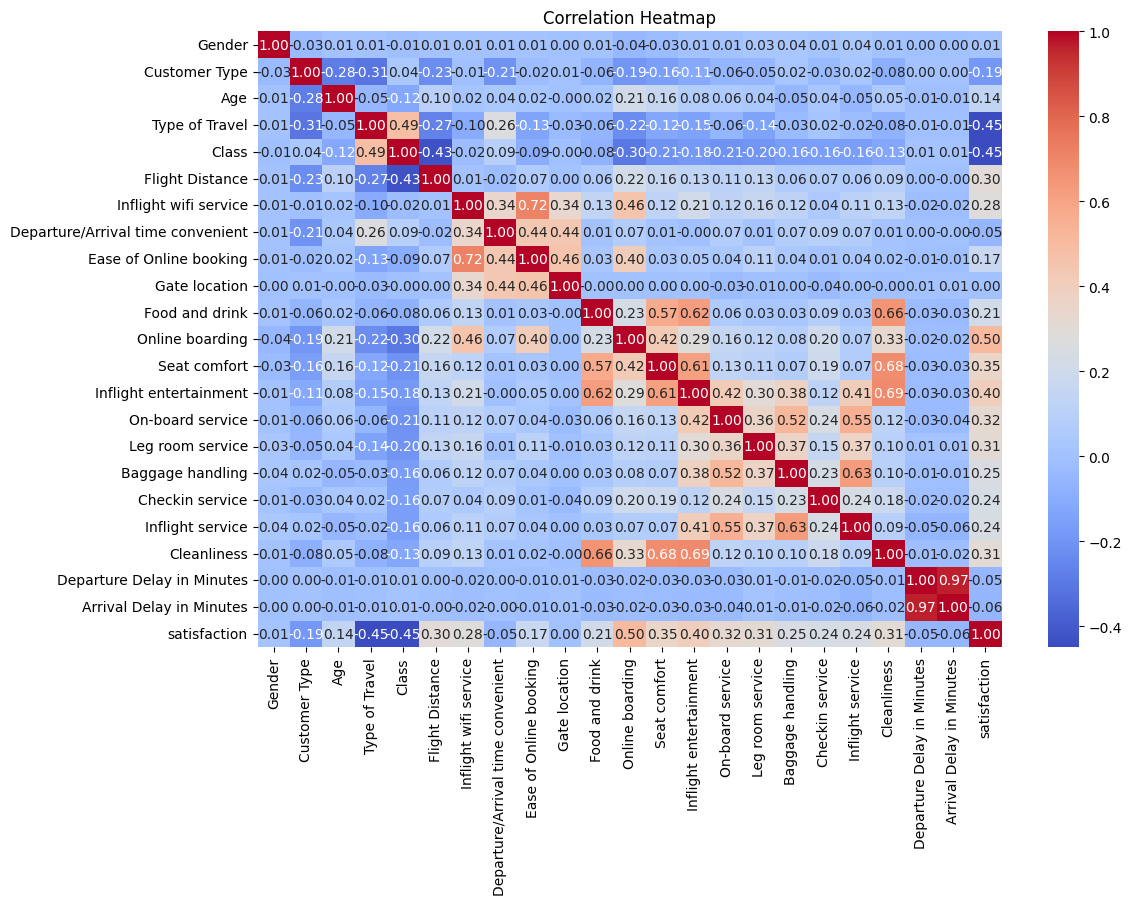

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Satisfaction distribution
sns.countplot(x='satisfaction', data=df)
plt.title('Satisfaction Distribution')
plt.show()

In [14]:
correlation = df.corr()['satisfaction'].sort_values(ascending=False)
print("Correlation with satisfaction:\n", correlation)

Correlation with satisfaction:
 satisfaction                         1.000000
Online boarding                      0.503447
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Flight Distance                      0.298915
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Ease of Online booking               0.171507
Age                                  0.137040
Gender                               0.012356
Gate location                        0.000449
Departure Delay in Minutes          -0.050515
Departure/Arrival time convenient   -0.051718
Arrival Delay in Minutes            -0.057582
Customer Type                       -0.187558
Ty

In [15]:
# Define features and target
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8735942854384864
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11655
           1       0.87      0.83      0.85      9064

    accuracy                           0.87     20719
   macro avg       0.87      0.87      0.87     20719
weighted avg       0.87      0.87      0.87     20719



In [16]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (K-Means Clustering)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [17]:
# Interactive scatter plot
fig = px.scatter(df, x='Flight Distance', y='Departure Delay in Minutes', color='satisfaction',
                 title='Flight Distance vs. Departure Delay by Satisfaction')
fig.show()

# Box plot for Age vs. Satisfaction
fig = px.box(df, x='satisfaction', y='Age', title='Age Distribution by Satisfaction')
fig.show()

In [18]:
# Filter datasets
satisfied_customers = df[df['satisfaction'] == 'satisfied']
dissatisfied_customers = df[df['satisfaction'] == 'neutral or dissatisfied']

In [19]:
# Summary statistics for satisfied customers
print("Satisfied Customers Summary:\n", satisfied_customers.describe())

# Summary statistics for dissatisfied customers
print("\nDissatisfied Customers Summary:\n", dissatisfied_customers.describe())

Satisfied Customers Summary:
        Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
count     0.0            0.0  0.0             0.0    0.0              0.0   
mean      NaN            NaN  NaN             NaN    NaN              NaN   
std       NaN            NaN  NaN             NaN    NaN              NaN   
min       NaN            NaN  NaN             NaN    NaN              NaN   
25%       NaN            NaN  NaN             NaN    NaN              NaN   
50%       NaN            NaN  NaN             NaN    NaN              NaN   
75%       NaN            NaN  NaN             NaN    NaN              NaN   
max       NaN            NaN  NaN             NaN    NaN              NaN   

       Inflight wifi service  Departure/Arrival time convenient  \
count                    0.0                                0.0   
mean                     NaN                                NaN   
std                      NaN                                NaN   
min     

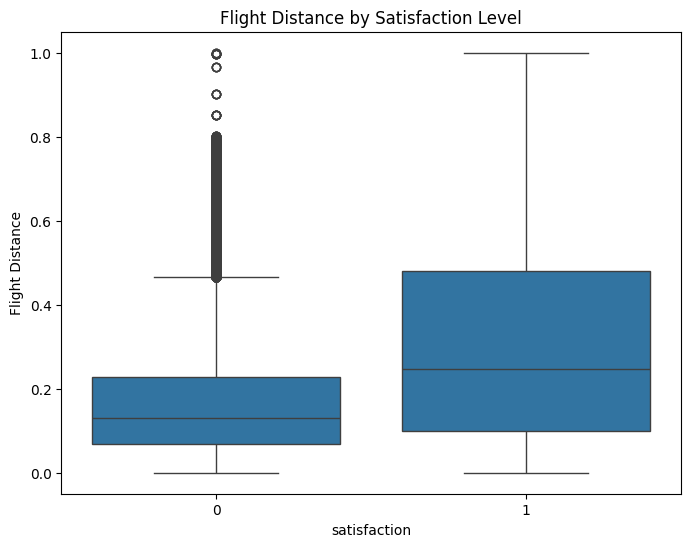

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Flight Distance vs Satisfaction
plt.figure(figsize=(8, 6))
sns.boxplot(x='satisfaction', y='Flight Distance', data=df)
plt.title('Flight Distance by Satisfaction Level')
plt.show()

# Histogram: Age Distribution by Satisfaction
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='satisfaction', multiple='stack', bins=30)
plt.title('Age Distribution by Satisfaction Level')
plt.show()

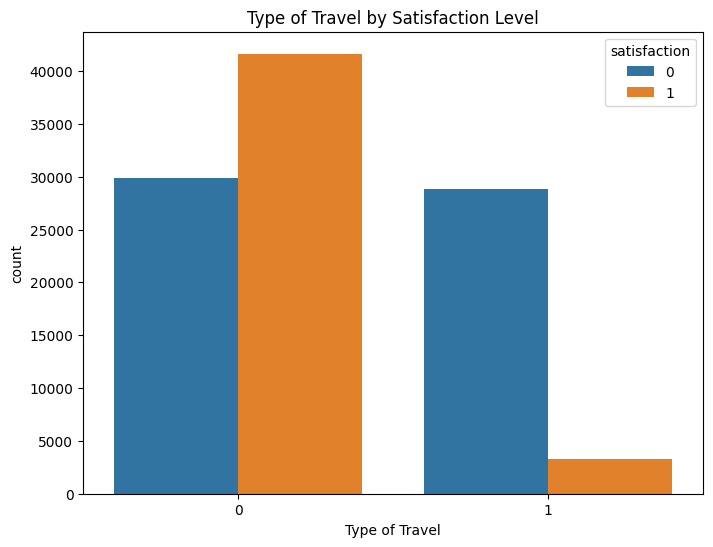

In [21]:
# Bar chart: Class distribution by satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='satisfaction', data=df)
plt.title('Class Distribution by Satisfaction Level')
plt.show()

# Bar chart: Type of Travel vs Satisfaction
plt.figure(figsize=(8, 6))
sns.countplot(x='Type of Travel', hue='satisfaction', data=df)
plt.title('Type of Travel by Satisfaction Level')
plt.show()